In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

In [113]:
titanic = sns.load_dataset('titanic')
titanic

survived  pclass     sex   age  sibsp  parch      fare embarked   class  \
0           0       3    male  22.0      1      0    7.2500        S   Third   
1           1       1  female  38.0      1      0   71.2833        C   First   
2           1       3  female  26.0      0      0    7.9250        S   Third   
3           1       1  female  35.0      1      0   53.1000        S   First   
4           0       3    male  35.0      0      0    8.0500        S   Third   
5           0       3    male   NaN      0      0    8.4583        Q   Third   
6           0       1    male  54.0      0      0   51.8625        S   First   
7           0       3    male   2.0      3      1   21.0750        S   Third   
8           1       3  female  27.0      0      2   11.1333        S   Third   
9           1       2  female  14.0      1      0   30.0708        C  Second   
10          1       3  female   4.0      1      1   16.7000        S   Third   
11          1       1  female  58.0      0      0   26.5500        S   First   
12          0       3    male  20.0      0      0    8.0500        S   Third   
13          0       3    male  39.0      1      5   31.2750        S   Third   
14          0       3  female  14.0      0      0    7.8542        S   Third   
15          1       2  female  55.0      0      0   16.0000        S  Second   
16          0       3    male   2.0      4      1   29.1250        Q   Third   
17          1       2    male   NaN      0      0   13.0000        S  Second   
18          0       3  female  31.0      1      0   18.0000        S   Third   
19          1       3  female   NaN      0      0    7.2250        C   Third   
20          0       2    male  35.0      0      0   26.0000        S  Second   
21          1       2    male  34.0      0      0   13.0000        S  Second   
22          1       3  female  15.0      0      0    8.0292        Q   Third   
23          1       1    male  28.0      0      0   35.5000        S   First   
24          0       3  female   8.0      3      1   21.0750        S   Third   
25          1       3  female  38.0      1      5   31.3875        S   Third   
26          0       3    male   NaN      0      0    7.2250        C   Third   
27          0       1    male  19.0      3      2  263.0000        S   First   
28          1       3  female   NaN      0      0    7.8792        Q   Third   
29          0       3    male   NaN      0      0    7.8958        S   Third   
..        ...     ...     ...   ...    ...    ...       ...      ...     ...   
861         0       2    male  21.0      1      0   11.5000        S  Second   
862         1       1  female  48.0      0      0   25.9292        S   First   
863         0       3  female   NaN      8      2   69.5500        S   Third   
864         0       2    male  24.0      0      0   13.0000        S  Second   
865         1       2  female  42.0      0      0   13.0000        S  Second   
866         1       2  female  27.0      1      0   13.8583        C  Second   
867         0       1    male  31.0      0      0   50.4958        S   First   
868         0       3    male   NaN      0      0    9.5000        S   Third   
869         1       3    male   4.0      1      1   11.1333        S   Third   
870         0       3    male  26.0      0      0    7.8958        S   Third   
871         1       1  female  47.0      1      1   52.5542        S   First   
872         0       1    male  33.0      0      0    5.0000        S   First   
873         0       3    male  47.0      0      0    9.0000        S   Third   
874         1       2  female  28.0      1      0   24.0000        C  Second   
875         1       3  female  15.0      0      0    7.2250        C   Third   
876         0       3    male  20.0      0      0    9.8458        S   Third   
877         0       3    male  19.0      0      0    7.8958        S   Third   
878         0       3    male   NaN      0      0    7.8958        S   Third   
879  

In [114]:
# del(titanic["dexk"])
titanic.drop("deck", 1, inplace=True)
titanic

survived  pclass     sex   age  sibsp  parch      fare embarked   class  \
0           0       3    male  22.0      1      0    7.2500        S   Third   
1           1       1  female  38.0      1      0   71.2833        C   First   
2           1       3  female  26.0      0      0    7.9250        S   Third   
3           1       1  female  35.0      1      0   53.1000        S   First   
4           0       3    male  35.0      0      0    8.0500        S   Third   
5           0       3    male   NaN      0      0    8.4583        Q   Third   
6           0       1    male  54.0      0      0   51.8625        S   First   
7           0       3    male   2.0      3      1   21.0750        S   Third   
8           1       3  female  27.0      0      2   11.1333        S   Third   
9           1       2  female  14.0      1      0   30.0708        C  Second   
10          1       3  female   4.0      1      1   16.7000        S   Third   
11          1       1  female  58.0      0      0   26.5500        S   First   
12          0       3    male  20.0      0      0    8.0500        S   Third   
13          0       3    male  39.0      1      5   31.2750        S   Third   
14          0       3  female  14.0      0      0    7.8542        S   Third   
15          1       2  female  55.0      0      0   16.0000        S  Second   
16          0       3    male   2.0      4      1   29.1250        Q   Third   
17          1       2    male   NaN      0      0   13.0000        S  Second   
18          0       3  female  31.0      1      0   18.0000        S   Third   
19          1       3  female   NaN      0      0    7.2250        C   Third   
20          0       2    male  35.0      0      0   26.0000        S  Second   
21          1       2    male  34.0      0      0   13.0000        S  Second   
22          1       3  female  15.0      0      0    8.0292        Q   Third   
23          1       1    male  28.0      0      0   35.5000        S   First   
24          0       3  female   8.0      3      1   21.0750        S   Third   
25          1       3  female  38.0      1      5   31.3875        S   Third   
26          0       3    male   NaN      0      0    7.2250        C   Third   
27          0       1    male  19.0      3      2  263.0000        S   First   
28          1       3  female   NaN      0      0    7.8792        Q   Third   
29          0       3    male   NaN      0      0    7.8958        S   Third   
..        ...     ...     ...   ...    ...    ...       ...      ...     ...   
861         0       2    male  21.0      1      0   11.5000        S  Second   
862         1       1  female  48.0      0      0   25.9292        S   First   
863         0       3  female   NaN      8      2   69.5500        S   Third   
864         0       2    male  24.0      0      0   13.0000        S  Second   
865         1       2  female  42.0      0      0   13.0000        S  Second   
866         1       2  female  27.0      1      0   13.8583        C  Second   
867         0       1    male  31.0      0      0   50.4958        S   First   
868         0       3    male   NaN      0      0    9.5000        S   Third   
869         1       3    male   4.0      1      1   11.1333        S   Third   
870         0       3    male  26.0      0      0    7.8958        S   Third   
871         1       1  female  47.0      1      1   52.5542        S   First   
872         0       1    male  33.0      0      0    5.0000        S   First   
873         0       3    male  47.0      0      0    9.0000        S   Third   
874         1       2  female  28.0      1      0   24.0000        C  Second   
875         1       3  female  15.0      0      0    7.2250        C   Third   
876         0       3    male  20.0      0      0    9.8458        S   Third   
877         0       3    male  19.0      0      0    7.8958        S   Third   
878         0       3    male   NaN      0      0    7.8958        S   Third   
879  

In [115]:
titanic["age"]

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
5       NaN
6      54.0
7       2.0
8      27.0
9      14.0
10      4.0
11     58.0
12     20.0
13     39.0
14     14.0
15     55.0
16      2.0
17      NaN
18     31.0
19      NaN
20     35.0
21     34.0
22     15.0
23     28.0
24      8.0
25     38.0
26      NaN
27     19.0
28      NaN
29      NaN
       ... 
861    21.0
862    48.0
863     NaN
864    24.0
865    42.0
866    27.0
867    31.0
868     NaN
869     4.0
870    26.0
871    47.0
872    33.0
873    47.0
874    28.0
875    15.0
876    20.0
877    19.0
878     NaN
879    56.0
880    25.0
881    33.0
882    22.0
883    28.0
884    25.0
885    39.0
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64

In [116]:
titanic.dropna(subset=["age"])

survived  pclass     sex   age  sibsp  parch      fare embarked   class  \
0           0       3    male  22.0      1      0    7.2500        S   Third   
1           1       1  female  38.0      1      0   71.2833        C   First   
2           1       3  female  26.0      0      0    7.9250        S   Third   
3           1       1  female  35.0      1      0   53.1000        S   First   
4           0       3    male  35.0      0      0    8.0500        S   Third   
6           0       1    male  54.0      0      0   51.8625        S   First   
7           0       3    male   2.0      3      1   21.0750        S   Third   
8           1       3  female  27.0      0      2   11.1333        S   Third   
9           1       2  female  14.0      1      0   30.0708        C  Second   
10          1       3  female   4.0      1      1   16.7000        S   Third   
11          1       1  female  58.0      0      0   26.5500        S   First   
12          0       3    male  20.0      0      0    8.0500        S   Third   
13          0       3    male  39.0      1      5   31.2750        S   Third   
14          0       3  female  14.0      0      0    7.8542        S   Third   
15          1       2  female  55.0      0      0   16.0000        S  Second   
16          0       3    male   2.0      4      1   29.1250        Q   Third   
18          0       3  female  31.0      1      0   18.0000        S   Third   
20          0       2    male  35.0      0      0   26.0000        S  Second   
21          1       2    male  34.0      0      0   13.0000        S  Second   
22          1       3  female  15.0      0      0    8.0292        Q   Third   
23          1       1    male  28.0      0      0   35.5000        S   First   
24          0       3  female   8.0      3      1   21.0750        S   Third   
25          1       3  female  38.0      1      5   31.3875        S   Third   
27          0       1    male  19.0      3      2  263.0000        S   First   
30          0       1    male  40.0      0      0   27.7208        C   First   
33          0       2    male  66.0      0      0   10.5000        S  Second   
34          0       1    male  28.0      1      0   82.1708        C   First   
35          0       1    male  42.0      1      0   52.0000        S   First   
37          0       3    male  21.0      0      0    8.0500        S   Third   
38          0       3  female  18.0      2      0   18.0000        S   Third   
..        ...     ...     ...   ...    ...    ...       ...      ...     ...   
856         1       1  female  45.0      1      1  164.8667        S   First   
857         1       1    male  51.0      0      0   26.5500        S   First   
858         1       3  female  24.0      0      3   19.2583        C   Third   
860         0       3    male  41.0      2      0   14.1083        S   Third   
861         0       2    male  21.0      1      0   11.5000        S  Second   
862         1       1  female  48.0      0      0   25.9292        S   First   
864         0       2    male  24.0      0      0   13.0000        S  Second   
865         1       2  female  42.0      0      0   13.0000        S  Second   
866         1       2  female  27.0      1      0   13.8583        C  Second   
867         0       1    male  31.0      0      0   50.4958        S   First   
869         1       3    male   4.0      1      1   11.1333        S   Third   
870         0       3    male  26.0      0      0    7.8958        S   Third   
871         1       1  female  47.0      1      1   52.5542        S   First   
872         0       1    male  33.0      0      0    5.0000        S   First   
873         0       3    male  47.0      0      0    9.0000        S   Third   
874         1       2  female  28.0      1      0   24.0000        C  Second   
875         1       3  female  15.0      0      0    7.2250        C   Third   
876         0       3    male  20.0      0      0    9.8458        S   Third   
877  

In [117]:
df = titanic
df["alive"].value_counts()


no     549
yes    342
Name: alive, dtype: int64

In [118]:
df.groupby("pclass")["alive"].value_counts()

pclass  alive
1       yes      136
        no        80
2       no        97
        yes       87
3       no       372
        yes      119
Name: alive, dtype: int64

In [148]:
alive_df = df.groupby("sibsp")["alive"].value_counts()
alive_df

sibsp  alive
0      no       398
       yes      210
1      yes      112
       no        97
2      no        15
       yes       13
3      no        12
       yes        4
4      no        15
       yes        3
5      no         5
8      no         7
Name: alive, dtype: int64

In [150]:
alive_df = df.groupby("sibsp")["alive"].value_counts()
divide = df.groupby("sibsp")["alive"].count()
print(alive_df[0][1]/ divide[0])
print(alive_df[1][0]/ divide[1])
print(alive_df[2][1]/ divide[2])
print(alive_df[3][1]/ divide[3])
print(alive_df[4][1]/ divide[4])

0.34539473684210525
0.5358851674641149
0.4642857142857143
0.25
0.16666666666666666


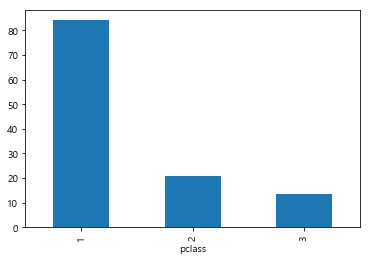

In [137]:
df.groupby("pclass")["fare"].mean().plot(kind="bar", )
plt.show()